<a href="https://colab.research.google.com/github/hllj/Codeforces/blob/master/lenet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import libraries and MNIST data:

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# 2.See some examples from dataset:

In [0]:
img_size = (28, 28)
n_classes = len(np.unique(y_train))
n_epochs = 20
batch_size = 512

In [8]:
print(n_classes)

10


In [0]:
image_shape = 32

In [0]:
# helper function to plot some image
def plot_digit(digit_image, digit_label, digit_pred = None):
  plt.imshow(digit_image.reshape((image_shape, image_shape)), cmap='gray')
  plt.show()
  if (digit_pred):
    print("Label : {} with Prediction : {}".format(digit_label, digit_pred))
  else: print('Label : {}'.format(digit_label))


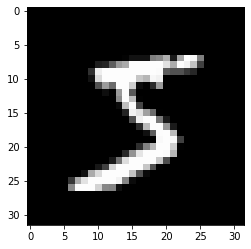

Label : 5


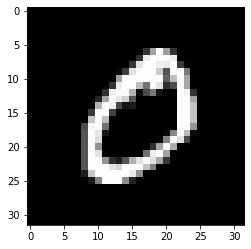

Label : 0


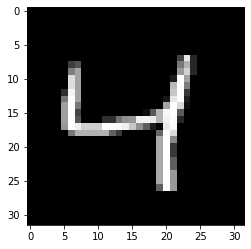

Label : 4


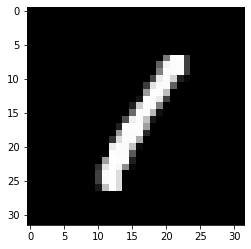

Label : 1


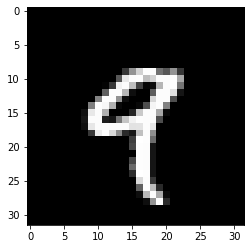

Label : 9


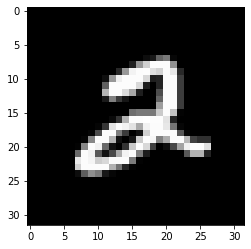

Label : 2


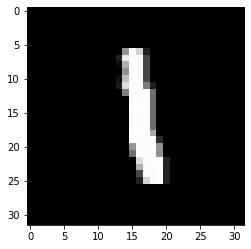

Label : 1


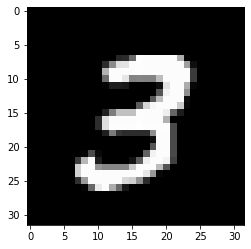

Label : 3


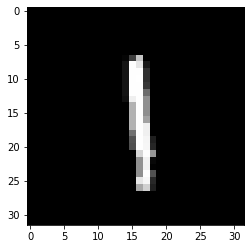

Label : 1


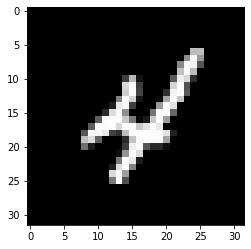

Label : 4


In [11]:
for i in range(10):
  plot_digit(X_train[i], y_train[i])

# 3.Modelling:

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import AveragePooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

In [0]:
def build_model(input_shape):
  model = Sequential()
  model.add(Conv2D(filters=6, kernel_size=5, strides=(1, 1), padding='VALID', activation='tanh', input_shape=input_shape))
  model.add(AveragePooling2D(pool_size=2, strides=2))
  model.add(Conv2D(filters=16, kernel_size=5, strides=(1, 1), padding='VALID', activation='tanh'))
  model.add(AveragePooling2D(pool_size=2, strides=2))
  model.add(Flatten())
  model.add(Dense(units=120, activation='tanh'))
  model.add(Dense(units=84, activation='tanh'))
  model.add(Dense(units=10, activation='softmax'))

  return model

In [0]:
lenet_model = build_model((32, 32, 1))

In [15]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
lenet_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# 4.Training model:

In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [18]:
history = lenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 518us/sample - loss: 0.4194 - accuracy: 0.8845 - val_loss: 0.1344 - val_accuracy: 0.9606
Epoch 2/20
60000/60000 [==============================] - 31s 520us/sample - loss: 0.1130 - accuracy: 0.9672 - val_loss: 0.0804 - val_accuracy: 0.9741
Epoch 3/20
60000/60000 [==============================] - 31s 517us/sample - loss: 0.0790 - accuracy: 0.9769 - val_loss: 0.0640 - val_accuracy: 0.9813
Epoch 4/20
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0639 - accuracy: 0.9815 - val_loss: 0.0597 - val_accuracy: 0.9813
Epoch 5/20
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0495 - val_accuracy: 0.9847
Epoch 6/20
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0442 - accuracy:

In [0]:
y_pred = lenet_model.predict(X_test)

In [20]:
lenet_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 278us/sample - loss: 0.0359 - accuracy: 0.9895


[0.035916757800302006, 0.9895]

In [21]:
y_pred[0]

array([2.1483338e-07, 1.6668635e-07, 1.1585242e-06, 8.5727157e-07,
       5.2670785e-08, 5.7783334e-09, 1.4826852e-10, 9.9999619e-01,
       2.0404274e-08, 1.3880604e-06], dtype=float32)

# 5.Checking wrong predictions:

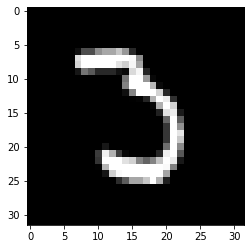

Label : 3 with Prediction : 5


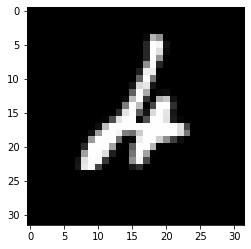

Label : 4 with Prediction : 2


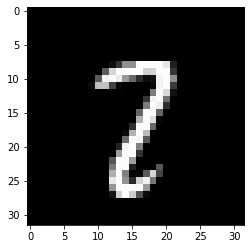

Label : 2 with Prediction : 7


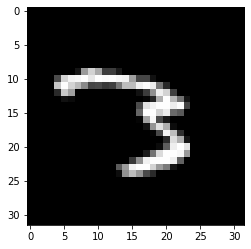

Label : 3 with Prediction : 7


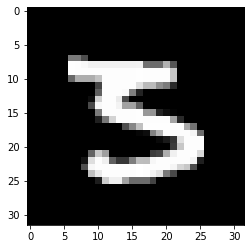

Label : 3 with Prediction : 5


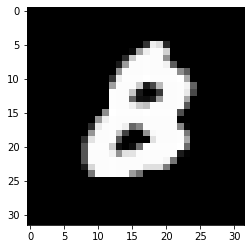

Label : 8 with Prediction : 2


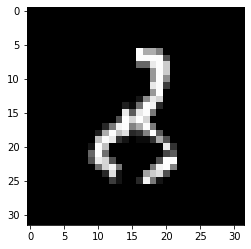

Label : 8 with Prediction : 2


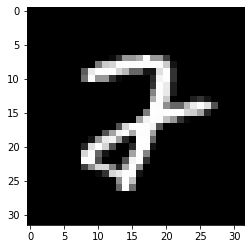

Label : 2 with Prediction : 7


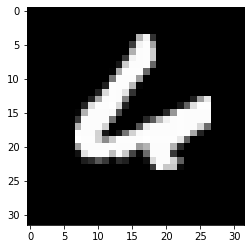

Label : 6 with Prediction : 4


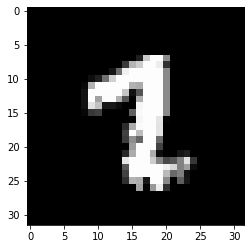

Label : 2 with Prediction : 1


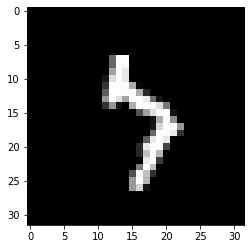

Label : 7 with Prediction : 5


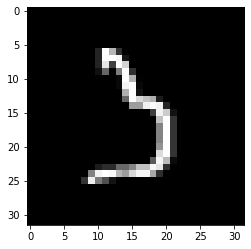

Label : 3 with Prediction : 5


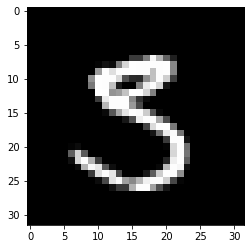

Label : 3 with Prediction : 5


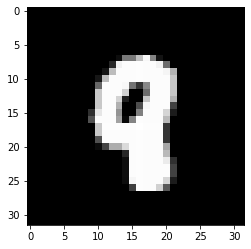

Label : 8 with Prediction : 9


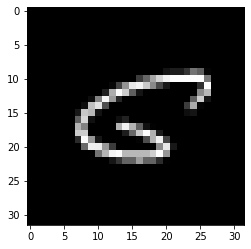

Label : 6 with Prediction : 5


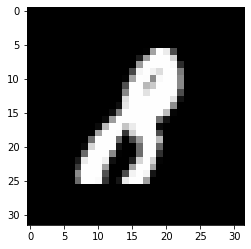

Label : 8 with Prediction : 1


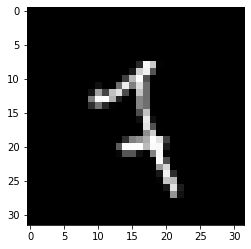

Label : 7 with Prediction : 1


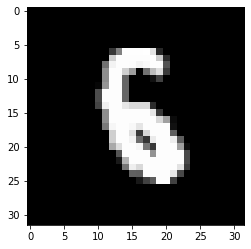

Label : 6 with Prediction : 5


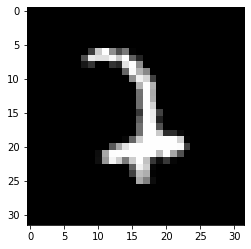

Label : 7 with Prediction : 2


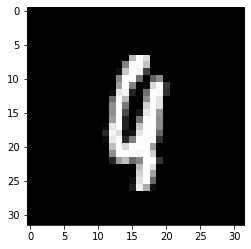

Label : 9 with Prediction : 4


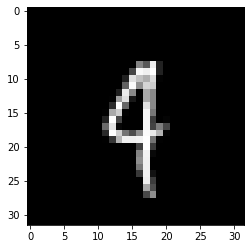

Label : 4 with Prediction : 9


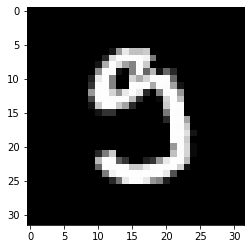

Label : 9 with Prediction : 5


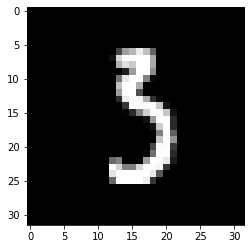

Label : 3 with Prediction : 5


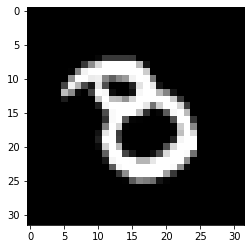

Label : 8


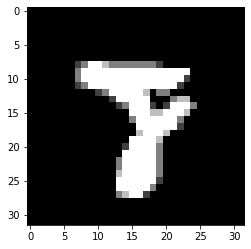

Label : 8 with Prediction : 7


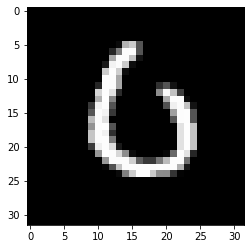

Label : 0 with Prediction : 6


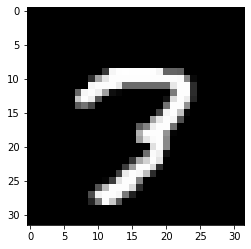

Label : 3 with Prediction : 7


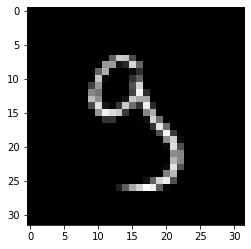

Label : 9 with Prediction : 5


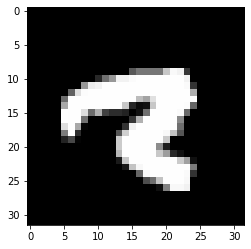

Label : 2 with Prediction : 7


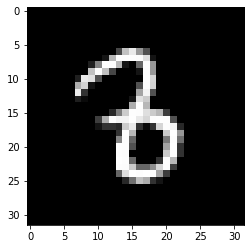

Label : 8 with Prediction : 3


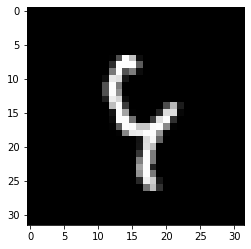

Label : 9 with Prediction : 4


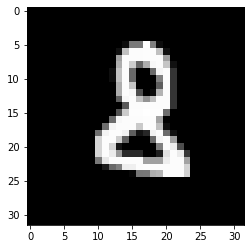

Label : 8 with Prediction : 2


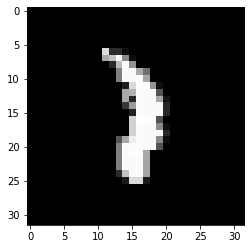

Label : 1 with Prediction : 7


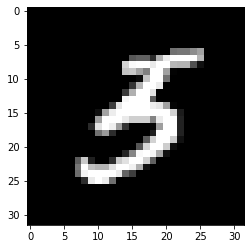

Label : 5 with Prediction : 3


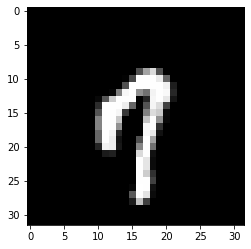

Label : 7 with Prediction : 9


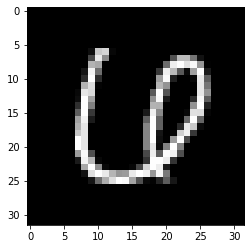

Label : 6


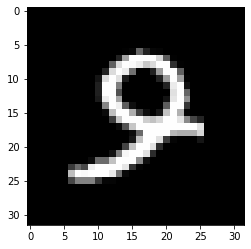

Label : 9 with Prediction : 8


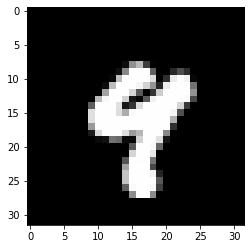

Label : 4 with Prediction : 9


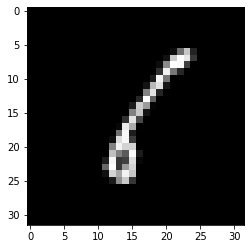

Label : 6 with Prediction : 1


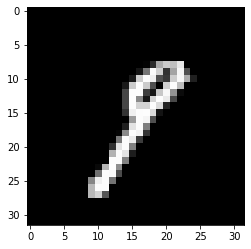

Label : 9 with Prediction : 1


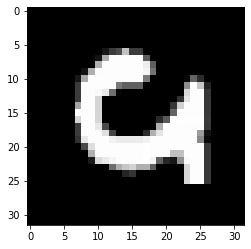

Label : 9 with Prediction : 4


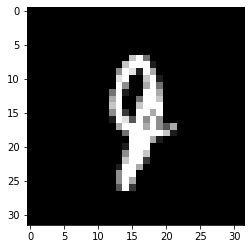

Label : 9 with Prediction : 4


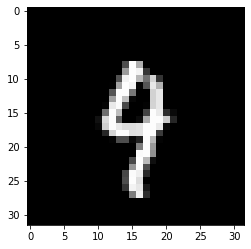

Label : 4 with Prediction : 9


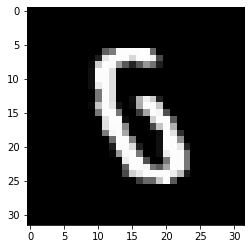

Label : 6 with Prediction : 5


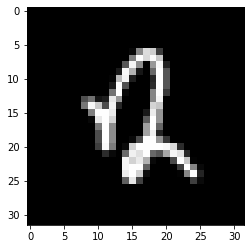

Label : 2 with Prediction : 4


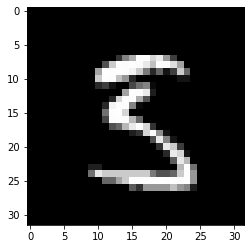

Label : 5 with Prediction : 3


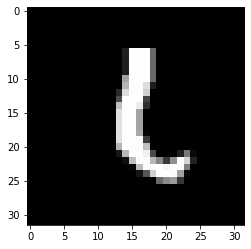

Label : 6 with Prediction : 1


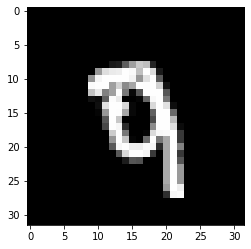

Label : 9 with Prediction : 7


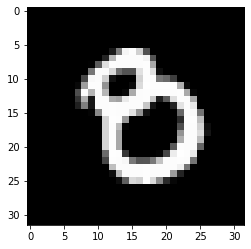

Label : 8


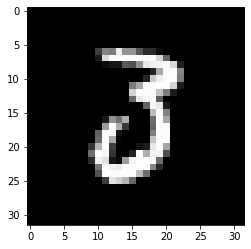

Label : 3 with Prediction : 8


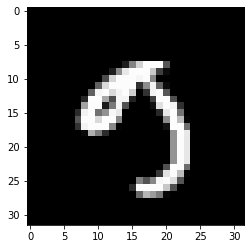

Label : 9 with Prediction : 5


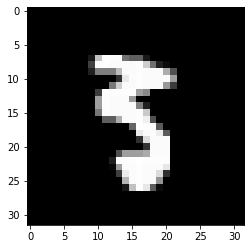

Label : 3 with Prediction : 5


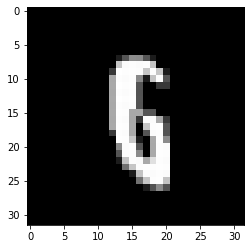

Label : 6 with Prediction : 8


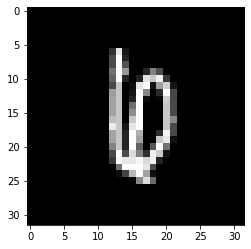

Label : 6


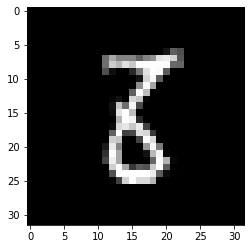

Label : 8 with Prediction : 3


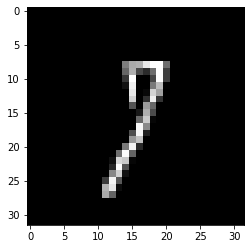

Label : 7 with Prediction : 9


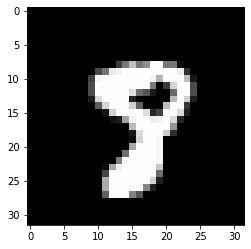

Label : 8 with Prediction : 9


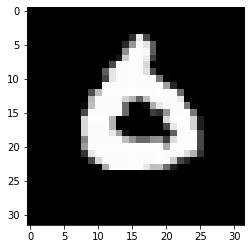

Label : 6


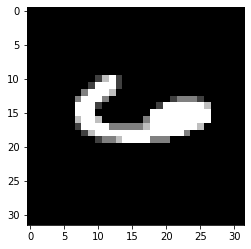

Label : 6 with Prediction : 4


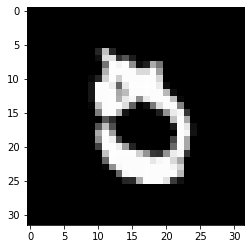

Label : 5


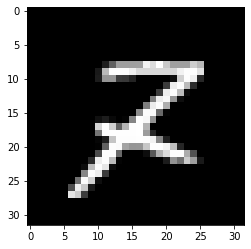

Label : 7 with Prediction : 2


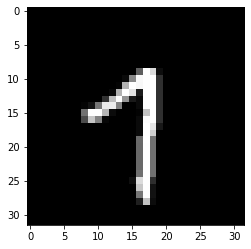

Label : 7 with Prediction : 1


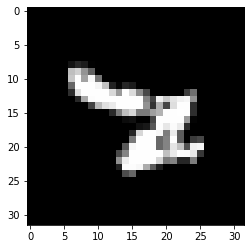

Label : 2 with Prediction : 7


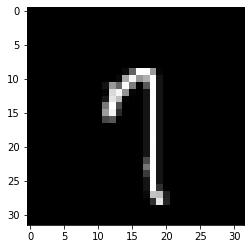

Label : 7 with Prediction : 9


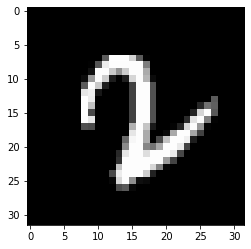

Label : 2 with Prediction : 7


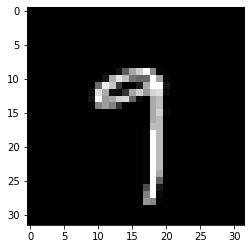

Label : 9 with Prediction : 7


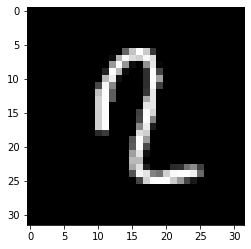

Label : 2 with Prediction : 1


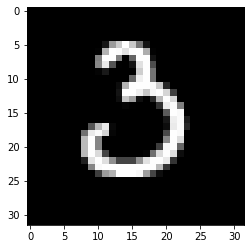

Label : 3


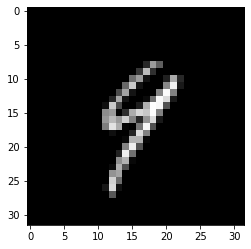

Label : 9 with Prediction : 4


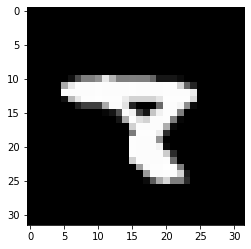

Label : 8 with Prediction : 7


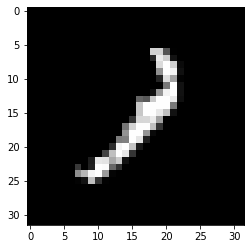

Label : 1 with Prediction : 7


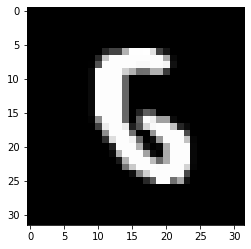

Label : 6 with Prediction : 5


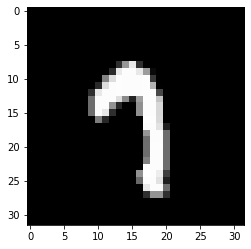

Label : 7 with Prediction : 9


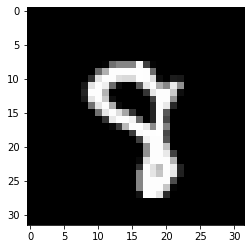

Label : 8 with Prediction : 9


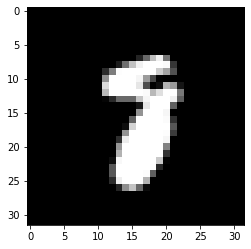

Label : 8 with Prediction : 7


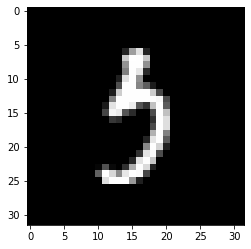

Label : 3 with Prediction : 5


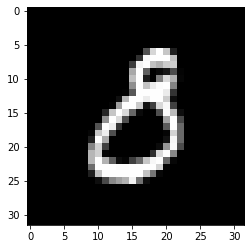

Label : 8


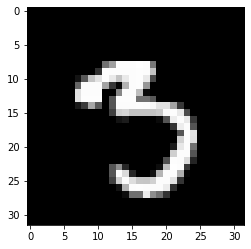

Label : 3 with Prediction : 5


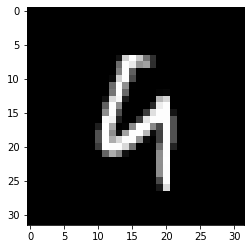

Label : 9 with Prediction : 4


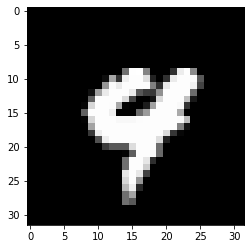

Label : 4 with Prediction : 9


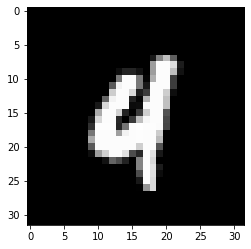

Label : 4 with Prediction : 9


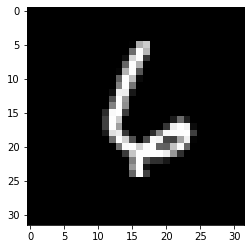

Label : 6 with Prediction : 4


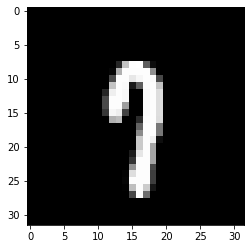

Label : 7 with Prediction : 9


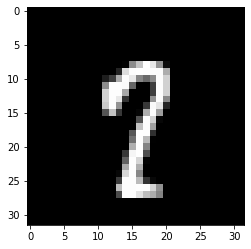

Label : 7 with Prediction : 2


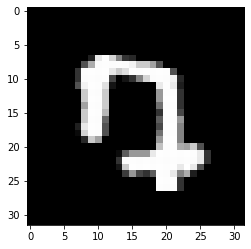

Label : 7


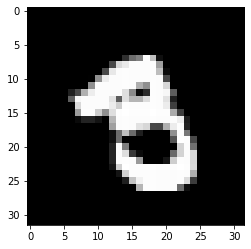

Label : 3 with Prediction : 8


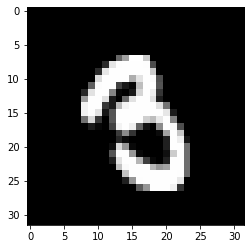

Label : 3 with Prediction : 8


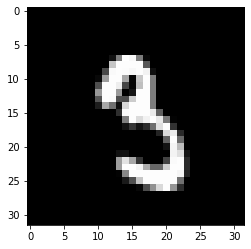

Label : 3 with Prediction : 9


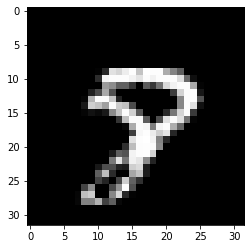

Label : 8 with Prediction : 9


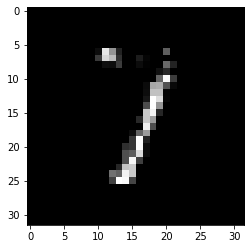

Label : 7 with Prediction : 1


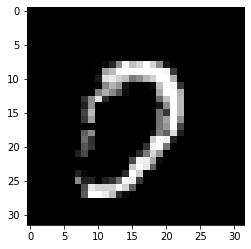

Label : 0 with Prediction : 7


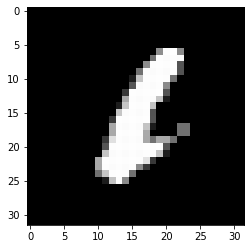

Label : 1 with Prediction : 6


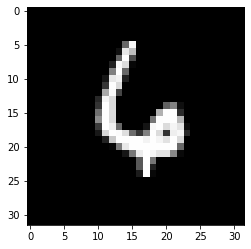

Label : 6 with Prediction : 4


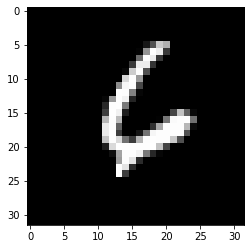

Label : 6 with Prediction : 4


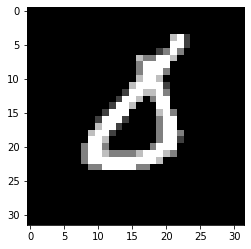

Label : 0 with Prediction : 4


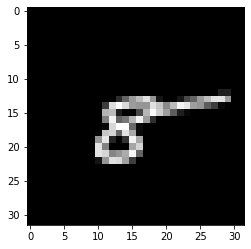

Label : 8 with Prediction : 5


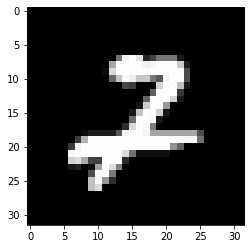

Label : 7 with Prediction : 2


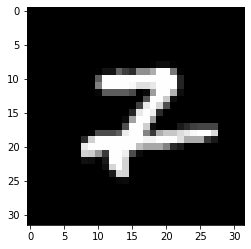

Label : 7 with Prediction : 2


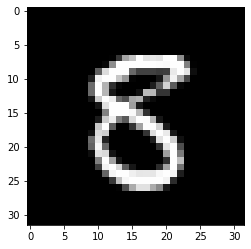

Label : 8 with Prediction : 5


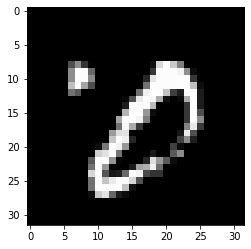

Label : 0 with Prediction : 1


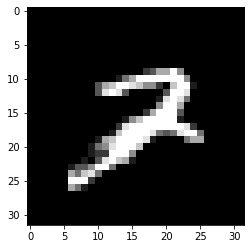

Label : 2 with Prediction : 7


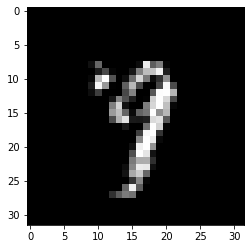

Label : 9 with Prediction : 7


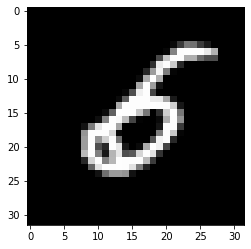

Label : 5 with Prediction : 6


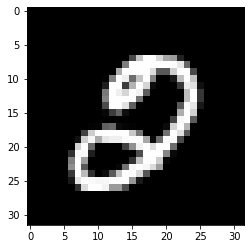

Label : 2


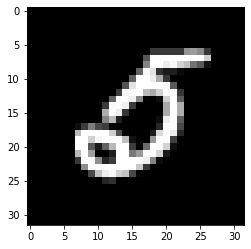

Label : 5


In [22]:
for i in range(len(y_test)):
  label = np.argmax(y_test[i])
  predict = np.argmax(y_pred[i])
  if label != predict:
    plot_digit(X_test[i], label, predict)

In [0]:
history_dict = history.history

In [24]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

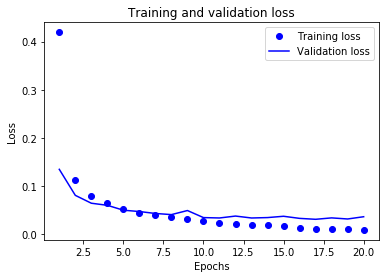

In [26]:
plt.plot(range(1, n_epochs + 1), loss, 'bo', label='Training loss')
plt.plot(range(1, n_epochs + 1), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [0]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

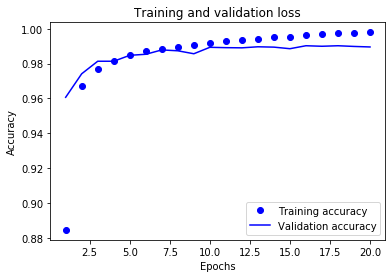

In [28]:
plt.plot(range(1, n_epochs + 1), acc, 'bo', label='Training accuracy')
plt.plot(range(1, n_epochs + 1), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()